In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Draw noises

sample_size = 200
Nv, Nw, Nx, Ny, Nz = (np.random.normal(size=sample_size) for _ in range(5))

In [3]:
# Build scm and plot X and W
def plot_X_W(alpha, 
             build_X_fn = lambda V, Nx: 2*V + Nx, 
             build_W_fn = lambda V, Y, Z, Nw: -2*V + 3*Y + 5*Z + Nw):
    V = Nv
    X = build_X_fn(V, Nx)
    Y = -X + Ny
    Z = alpha*X + Nz
    W = build_W_fn(V, Y, Z, Nw)
    
    sns.jointplot(x="X", y="W", data=pd.DataFrame(data={"X": X, "W": W}))

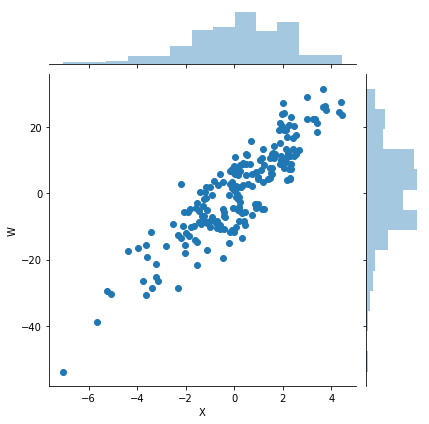

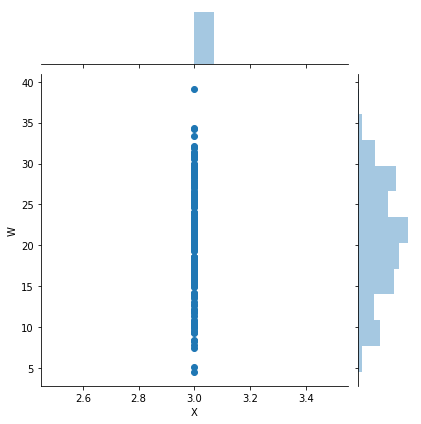

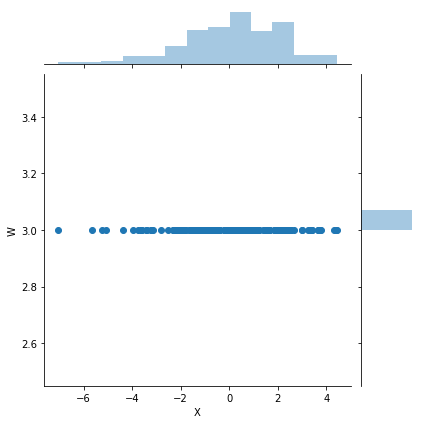

In [4]:
alpha = 2
plot_X_W(alpha=alpha)
plot_X_W(alpha=alpha, build_X_fn=lambda V, Nx: 3 * np.ones_like(Nx))
plot_X_W(alpha=alpha, build_W_fn=lambda V, Y, Z, Nw: 3 * np.ones_like(Nw))

The first graph shows that X and W are not independant. Intervening on X changes the marginal distribution of W (graph 2), but intervening on W doesn't change the marginal distribution of X: there is a total causal effect from X to W.

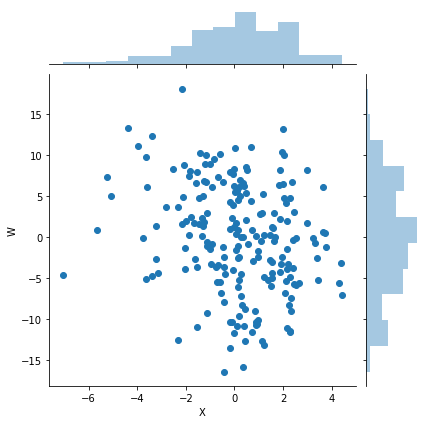

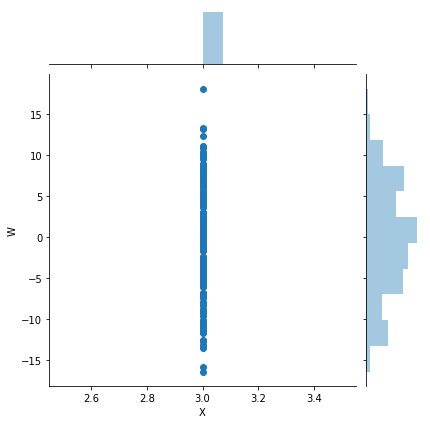

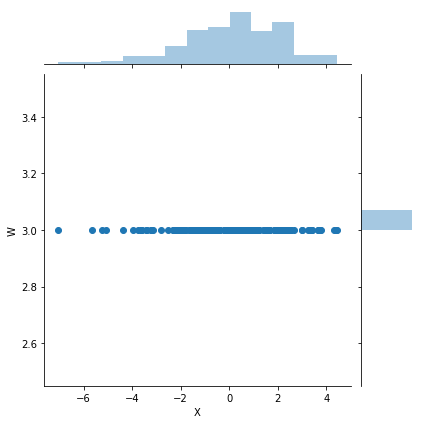

In [5]:
alpha = 3/5
plot_X_W(alpha=alpha)
plot_X_W(alpha=alpha, build_X_fn=lambda V, Nx: 3 * np.ones_like(Nx))
plot_X_W(alpha=alpha, build_W_fn=lambda V, Y, Z, Nw: 3 * np.ones_like(Nw))

With alpha=3/5, W is now independant from X, even though there is a directed path from X to W in the DAG.